In [1]:
import random
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as stats
from scipy.stats import norm
from datetime import datetime, timedelta
import statsmodels.api as sm
%matplotlib inline

In [2]:
tickers=['^GSPC']

In [3]:
df=yf.download(tickers,start='2014-12-02',end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-01,2065.780029,2065.780029,2049.570068,2053.439941,2053.439941,4159010000
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000
...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000


In [5]:
df['Return']=df['Close'].pct_change()
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000,0.006384
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000,0.003765
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000,-0.001162
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000,0.001665
2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,2060.310059,3800990000,-0.007257
...,...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000,0.000866
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000,-0.000195
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000,0.005128


In [6]:
df['Sorted']=df['Return'].sort_values(ascending=True).values
df

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,Return,Sorted
Date,,,,,,,,
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000,0.006384,-0.040979
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000,0.003765,-0.039414
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000,-0.001162,-0.037536
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000,0.001665,-0.035920
2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,2060.310059,3800990000,-0.007257,-0.032864
...,...,...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000,0.000866,0.025083
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000,-0.000195,0.027157
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000,0.005128,0.034336


In [7]:
df['Rank']=[i for i in range(1,len(df)+1)]
df

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,Return,Sorted,Rank
Date,,,,,,,,,
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000,0.006384,-0.040979,1
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000,0.003765,-0.039414,2
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000,-0.001162,-0.037536,3
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000,0.001665,-0.035920,4
2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,2060.310059,3800990000,-0.007257,-0.032864,5
...,...,...,...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000,0.000866,0.025083,1274
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000,-0.000195,0.027157,1275
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000,0.005128,0.034336,1276


In [8]:
df['Emperical Distribution']=df['Rank']/len(df['Return'])
df

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,Return,Sorted,Rank,Emperical Distribution
Date,,,,,,,,,,
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000,0.006384,-0.040979,1,0.000782
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000,0.003765,-0.039414,2,0.001565
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000,-0.001162,-0.037536,3,0.002347
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000,0.001665,-0.035920,4,0.003130
2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,2060.310059,3800990000,-0.007257,-0.032864,5,0.003912
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000,0.000866,0.025083,1274,0.996870
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000,-0.000195,0.027157,1275,0.997653
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000,0.005128,0.034336,1276,0.998435


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


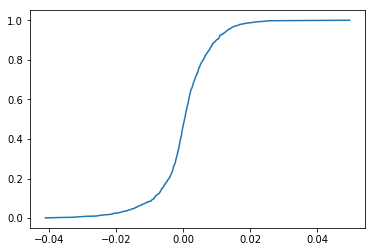

In [9]:
plt.plot(df['Sorted'],df['Emperical Distribution'])

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


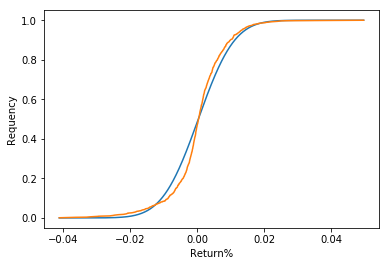

In [10]:
n,minmax,mean,var,skew,kurt=stats.describe(df['Return'])
mini,maxi=minmax
std=var**0.5#0.0002496130**0.5=0.015799145546516114
#making a normal distribution Using upper right skweed distribution mean,standard deviation,and obserbations
x=norm.rvs(mean,std,n)
overly=np.linspace(mini,maxi,n)
df['Theoritical distribution']=norm.cdf(overly,mean,std)
plt.plot(overly,norm.cdf(overly,mean,std))
plt.plot(df['Sorted'],df['Emperical Distribution'])
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [11]:
df['Difference']=(df['Emperical Distribution']-df['Theoritical distribution'])
df

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,Return,Sorted,Rank,Emperical Distribution,Theoritical distribution,Difference
Date,,,,,,,,,,,,
2014-12-02,2053.770020,2068.770020,2053.770020,2066.550049,2066.550049,3686650000,0.006384,-0.040979,1,0.000782,5.443777e-07,7.819282e-04
2014-12-03,2067.449951,2076.280029,2066.649902,2074.330078,2074.330078,3612680000,0.003765,-0.039414,2,0.001565,5.679016e-07,1.564377e-03
2014-12-04,2073.639893,2077.340088,2062.340088,2071.919922,2071.919922,3408340000,-0.001162,-0.037536,3,0.002347,5.924022e-07,2.346825e-03
2014-12-05,2072.780029,2079.469971,2070.810059,2075.370117,2075.370117,3419620000,0.001665,-0.035920,4,0.003130,6.179180e-07,3.129273e-03
2014-12-08,2074.840088,2075.780029,2054.270020,2060.310059,2060.310059,3800990000,-0.007257,-0.032864,5,0.003912,6.444894e-07,3.911719e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3064530000,0.000866,0.025083,1274,0.996870,1.000000e+00,-3.129886e-03
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000,-0.000195,0.027157,1275,0.997653,1.000000e+00,-2.347414e-03
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000,0.005128,0.034336,1276,0.998435,1.000000e+00,-1.564942e-03


In [12]:
supremum=df['Difference'].max()
supremum

0.25344165844282696

In [13]:
kolmogorov_Smirnov=supremum*np.sqrt(1258)
kolmogorov_Smirnov

8.989143684839352

In [14]:
round(np.exp(-(supremum**2)*1258),2)#so we are 100% sure that the difference isnt generated by any random chance

0.0